In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import string 
import os 
import shutil 
import re 
import tensorflow as tf 

# keras is a python interface for neural networks
from keras.models import Sequential 
from keras.layers import SimpleRNN , Dense , Embedding 
from tensorflow.keras.layers import TextVectorization 
from keras.optimizers import Adam 

from sklearn.linear_model import LinearRegression

# Generating Training Data 

In [3]:
sequence  = np.array(list(range(10))).astype(float)

In [4]:
sequence

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [5]:
window_size = 3

In [6]:
train_data = [np.array(sequence[i:i+window_size]).reshape(1,-1) for i in range(sequence.shape[0]-window_size)]
train_data = np.concatenate(train_data*10, axis=0)
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)
train_data

array([[[0.],
        [1.],
        [2.]],

       [[1.],
        [2.],
        [3.]],

       [[2.],
        [3.],
        [4.]],

       [[3.],
        [4.],
        [5.]],

       [[4.],
        [5.],
        [6.]],

       [[5.],
        [6.],
        [7.]],

       [[6.],
        [7.],
        [8.]],

       [[0.],
        [1.],
        [2.]],

       [[1.],
        [2.],
        [3.]],

       [[2.],
        [3.],
        [4.]],

       [[3.],
        [4.],
        [5.]],

       [[4.],
        [5.],
        [6.]],

       [[5.],
        [6.],
        [7.]],

       [[6.],
        [7.],
        [8.]],

       [[0.],
        [1.],
        [2.]],

       [[1.],
        [2.],
        [3.]],

       [[2.],
        [3.],
        [4.]],

       [[3.],
        [4.],
        [5.]],

       [[4.],
        [5.],
        [6.]],

       [[5.],
        [6.],
        [7.]],

       [[6.],
        [7.],
        [8.]],

       [[0.],
        [1.],
        [2.]],

       [[1.],
        [2.],
    

In [7]:
train_data.shape

(70, 3, 1)

In [11]:
#get training labels
train_label = [sequence[i+window_size] for i in range(sequence.shape[0]-window_size)]
train_label = np.concatenate([train_label]*10).reshape(-1,1)

# Train Model 


In [12]:
#init model
model = Sequential()  

#RNN
model.add(SimpleRNN(1, activation='linear'))  #activation function is linear 

#compile model
opt = Adam(learning_rate=1.0)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])

#train model
model.fit(train_data, train_label, epochs=100, verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 45.4833 - mse: 45.4833
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 45.0136 - mse: 45.0136
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 33.7211 - mse: 33.7211
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.9977 - mse: 5.9977
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.5640 - mse: 1.5640 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.2967 - mse: 4.2967
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3757 - mse: 3.3757
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.9917 - mse: 0.9917
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.7307 - mse: 1.7307
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.1430 - mse: 1.1430
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1407 - mse: 0.1407
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4357 - mse: 0.4357
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [13]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

# Prediction using the model 


In [17]:
prds = model.predict(train_data).flatten()
prds

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([3.0000014, 4.0000024, 5.0000033, 6.000004 , 7.000005 , 8.000006 ,
       9.000007 , 3.0000014, 4.0000024, 5.0000033, 6.000004 , 7.000005 ,
       8.000006 , 9.000007 , 3.0000014, 4.0000024, 5.0000033, 6.000004 ,
       7.000005 , 8.000006 , 9.000007 , 3.0000014, 4.0000024, 5.0000033,
       6.000004 , 7.000005 , 8.000006 , 9.000007 , 3.0000014, 4.0000024,
       5.0000033, 6.000004 , 7.000005 , 8.000006 , 9.000007 , 3.0000014,
       4.0000024, 5.0000033, 6.000004 , 7.000005 , 8.000006 , 9.000007 ,
       3.0000014, 4.0000024, 5.0000033, 6.000004 , 7.000005 , 8.000006 ,
       9.000007 , 3.0000014, 4.0000024, 5.0000033, 6.000004 , 7.000005 ,
       8.000006 , 9.000007 , 3.0000014, 4.0000024, 5.0000033, 6.000004 ,
       7.000005 , 8.000006 , 9.000007 , 3.0000014, 4.0000024, 5.0000033,
       6.000004 , 7.000005 , 8.000006 , 9.000007 ], dtype=float32)

In [16]:
for i in range(len(prds[:3])):
    example = train_data[i].flatten() 
    pred = prds[i]
    print(f'{example} -> {pred}')

[0. 1. 2.] -> 3.0000014305114746
[1. 2. 3.] -> 4.000002384185791
[2. 3. 4.] -> 5.000003337860107


Text(0, 0.5, 'actual')

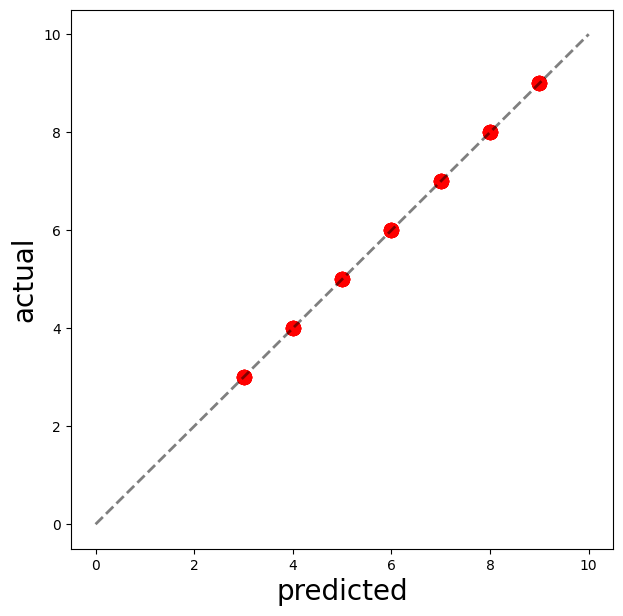

In [25]:
plt.figure(figsize=(7,7))
actuals = train_label.flatten()
plt.plot([0,10], [0,10], color='k', linestyle='--', alpha=0.5, linewidth=2)
plt.scatter(prds, actuals, s=100, color='r')

plt.xlabel('predicted', fontsize=20)
plt.ylabel('actual', fontsize=20)

In [26]:
# on unknown data
out_of_sample_data = np.array([[6,7,8], [7,8,9], [8,9,10], [9,10,11], [10,11,12]]).reshape(5,3,1)

In [27]:
#make predictions using the model
preds = model.predict(out_of_sample_data).flatten()
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


array([ 9.000007 , 10.000008 , 11.000009 , 12.00001  , 13.0000105],
      dtype=float32)

In [28]:
#print some outputs
for i in range(len(preds)):
    example = out_of_sample_data[i].flatten()
    pred = preds[i]
    print(f'{example} -> {pred}')

[6 7 8] -> 9.000006675720215
[7 8 9] -> 10.000007629394531
[ 8  9 10] -> 11.000008583068848
[ 9 10 11] -> 12.000009536743164
[10 11 12] -> 13.00001049041748


# A look under the hood 


In [29]:
#input vector weights in RNN (U)
model.weights[0].numpy()

array([[0.893301]], dtype=float32)

In [30]:
#recurrent state weights in RNN (V)
model.weights[1].numpy()

array([[0.10781947]], dtype=float32)

In [31]:
#bias term weights in RNN (b)
model.weights[2].numpy()

array([0.99789155], dtype=float32)

# So the model has learned that
## $y_t = 0.93x_t + 0.07y_{t-1} + 1$
## $y_t = 0.93x_t + 0.07x_t + 1$
## $y_t = x_t + 1$

In [32]:
clf = LinearRegression()
clf.fit(train_data.reshape((train_data.shape[0], -1)), train_label.flatten())

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
#make predictions using the linear model
n = out_of_sample_data.shape[0]
preds = clf.predict(out_of_sample_data.reshape(n,-1)).flatten()

In [34]:
#print some outputs
for i in range(len(preds)):
    example = out_of_sample_data[i].flatten()
    pred = preds[i]
    print(f'{example} -> {pred}')

[6 7 8] -> 8.999999999999998
[7 8 9] -> 9.999999999999996
[ 8  9 10] -> 10.999999999999996
[ 9 10 11] -> 11.999999999999995
[10 11 12] -> 12.999999999999995


# Harder case which the linear model will not solve


In [35]:
def sigmoid(v):
    return 1.0 / (1.0 + np.exp(-v))

In [36]:
sequence = np.sin(np.arange(0,6*3.14159,0.1))
sequence += np.random.normal(0,0.05,len(sequence))
sequence

array([-0.01361566,  0.10405022,  0.26120244,  0.26843042,  0.34300182,
        0.42178512,  0.3980006 ,  0.60239435,  0.66993438,  0.8197251 ,
        0.79732541,  0.99186411,  0.90995143,  0.96390153,  0.91769754,
        0.97851611,  0.97771355,  1.04713737,  1.03972249,  0.99728   ,
        0.84601987,  0.78521733,  0.7688785 ,  0.808642  ,  0.68891813,
        0.56184227,  0.5395747 ,  0.40815048,  0.34555497,  0.24803822,
        0.18037977,  0.06855889, -0.07872831, -0.25146177, -0.26063226,
       -0.39486565, -0.52081456, -0.53565277, -0.520543  , -0.63118935,
       -0.78684082, -0.83052451, -0.83507691, -0.88421931, -0.97383869,
       -0.92760687, -0.98001415, -1.02181868, -0.94384896, -0.91321352,
       -0.93798827, -0.96465624, -0.85876738, -0.79739434, -0.69452978,
       -0.74290356, -0.64618155, -0.63796854, -0.40186313, -0.40252442,
       -0.33759472, -0.21183766, -0.07412487,  0.01506763,  0.06911784,
        0.24806223,  0.28115049,  0.38584819,  0.43152672,  0.58

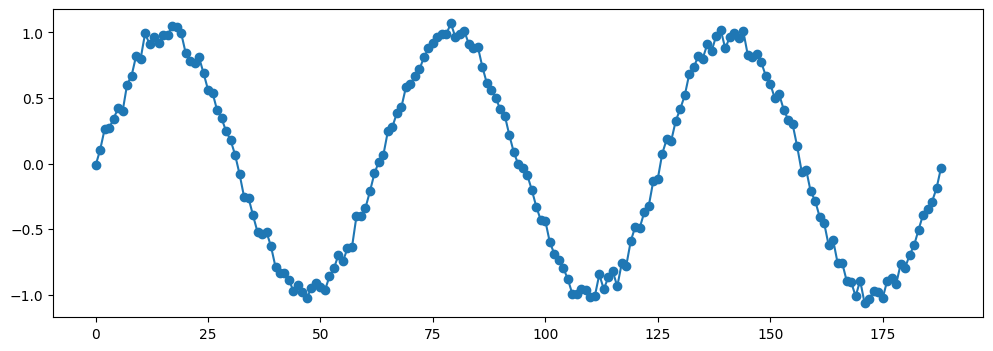

In [37]:
plt.figure(figsize=(12,4))
plt.plot(sequence)
plt.scatter(range(len(sequence)), sequence)

In [38]:
#generate training data
train_data = [np.array(sequence[i:i+window_size]).reshape(1,-1) for i in range(sequence.shape[0]-window_size)]
train_data = np.concatenate(train_data*10, axis=0)
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)

In [39]:
#get training labels
train_label = [sequence[i+window_size] for i in range(sequence.shape[0]-window_size)]
train_label = np.concatenate([train_label]*10).reshape(-1,1)

In [40]:
train_data

array([[[-0.01361566],
        [ 0.10405022],
        [ 0.26120244]],

       [[ 0.10405022],
        [ 0.26120244],
        [ 0.26843042]],

       [[ 0.26120244],
        [ 0.26843042],
        [ 0.34300182]],

       ...,

       [[-0.50289341],
        [-0.38920807],
        [-0.34652792]],

       [[-0.38920807],
        [-0.34652792],
        [-0.28913606]],

       [[-0.34652792],
        [-0.28913606],
        [-0.18655306]]], shape=(1860, 3, 1))

In [41]:
train_label

array([[ 0.26843042],
       [ 0.34300182],
       [ 0.42178512],
       ...,
       [-0.28913606],
       [-0.18655306],
       [-0.03008114]], shape=(1860, 1))

In [42]:
# when we try to do with the linear data 
clf = LinearRegression()
clf.fit(train_data.reshape((train_data.shape[0], -1)), train_label.flatten())

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
#make predictions using the linear model
preds = []
input_vec = train_data[-1].copy()
for _ in range(15):
    pred = clf.predict(input_vec.reshape(1,-1)).flatten()
    preds.append(pred[0])
    input_vec[0][-1] = pred[0]

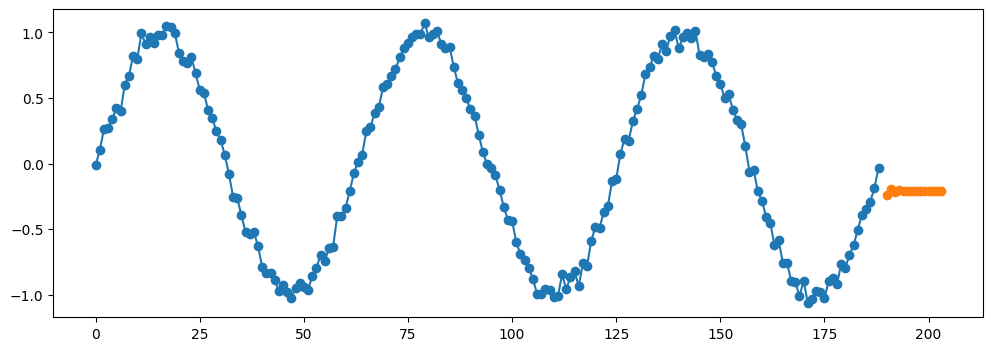

In [44]:
plt.figure(figsize=(12,4))
plt.plot(sequence)
plt.scatter(range(len(sequence)), sequence)
plt.scatter(range(len(sequence)+1, len(sequence)+15), preds[1:])

# Here the prediction are completely flatten

In [45]:
# Now by using RNN
#init model
model = Sequential()  

#RNN
model.add(SimpleRNN(2, activation='tanh'))  # here 2 represents the dimentions in the hidden layer which gives more flexibility 

#Dense layer
model.add(Dense(1)) # Vanila Neural network which takes vector 2 and gives vector 1

#compile model
opt = Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])

#train model
model.fit(train_data, train_label, epochs=25, verbose=1)

Epoch 1/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0512 - mse: 0.0512
Epoch 2/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0083 - mse: 0.0083
Epoch 3/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0070 - mse: 0.0070
Epoch 4/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mse: 0.0107
Epoch 5/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mse: 0.0074
Epoch 6/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 - mse: 0.0097
Epoch 7/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 - mse: 0.0073
Epoch 8/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086 - mse: 0.0086
Epoch 9/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 - mse: 0.0073
Epoch 10/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076 - mse: 0.0076
Epoch 11/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084 - mse: 0.0084
Epoch 12/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068 - mse: 0.0068
Epoch 13/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

In [46]:
#make predictions using the linear model
preds = []
input_vec = train_data[-1:].copy()
for _ in range(15):
    pred = model.predict(input_vec).flatten()
    preds.append(pred[0])
    input_vec[0][-1] = pred[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


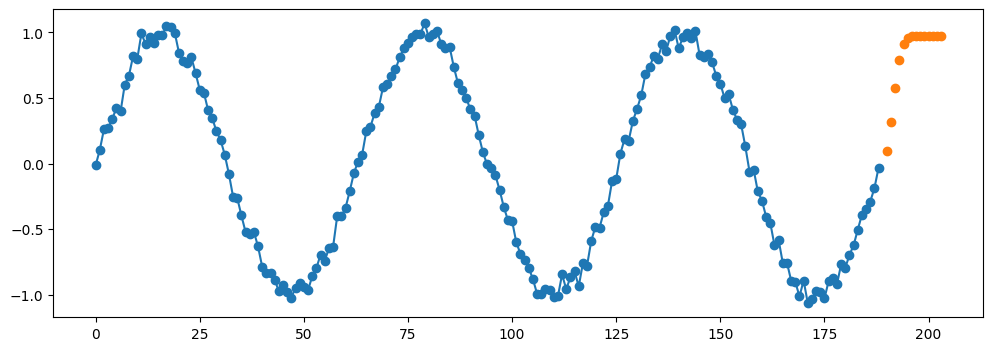

In [47]:
plt.figure(figsize=(12,4))
plt.plot(sequence)
plt.scatter(range(len(sequence)), sequence)
plt.scatter(range(len(sequence)+1, len(sequence)+15), preds[1:])

# Sentimental analysis (RNN application in NLP)

In [ ]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1.tar.gz", url,
                                  untar=True, cache_dir='.',
                                  cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')
os.listdir(dataset_dir)

76374016/84125825 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

In [ ]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)